In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [107]:
# Filenames for each set of data
acc_files = {
    'laying_down': ['data/Laying1/Accelerometer.csv', 'data/Laying2/Accelerometer.csv', 'data/Laying3/Accelerometer.csv'],
    'standing_up': ['data/Stand1/Accelerometer.csv', 'data/Stand2/Accelerometer.csv', 'data/Stand3/Accelerometer.csv'],
    'moving_circle': ['data/Cycle1/Accelerometer.csv', 'data/Cycle2/Accelerometer.csv', 'data/Cycle3/Accelerometer.csv']
}

gyro_files = {
    'laying_down': ['data/Laying1/Gyroscope.csv', 'data/Laying2/Gyroscope.csv', 'data/Laying3/Gyroscope.csv'],
    'standing_up': ['data/Stand1/Gyroscope.csv', 'data/Stand2/Gyroscope.csv', 'data/Stand3/Gyroscope.csv'],
    'moving_circle': ['data/Cycle1/Gyroscope.csv', 'data/Cycle2/Gyroscope.csv', 'data/Cycle3/Gyroscope.csv']
}


 <h1> <li>  Plot the accelerometer values using the plot functions accessible for panda dataframes. Plot all accelerometer values, i.e. all samples for all components of the accelerometer vector 


In [108]:


# Create empty lists to hold the dataframes
acc_dataframes = []
gyro_dataframes = []

# Load accelerometer data
for position, files in acc_files.items():
    for file in files:
        df = pd.read_csv(file, usecols=[1, 2, 3], names=['ax', 'ay', 'az'], skiprows=[0])
        df['class'] = position  # Label the data with the position (class)
        acc_dataframes.append(df)

# Load gyroscope data
for position, files in gyro_files.items():
    for file in files:
        df = pd.read_csv(file, usecols=[1, 2, 3], names=['gx', 'gy', 'gz'], skiprows=[0])
        df['class'] = position  # Label the data with the position (class)
        gyro_dataframes.append(df)


In [109]:
# Combine all accelerometer data
combined_acc_data = pd.concat(acc_dataframes, ignore_index=True)

# Combine all gyroscope data
combined_gyro_data = pd.concat(gyro_dataframes, ignore_index=True)


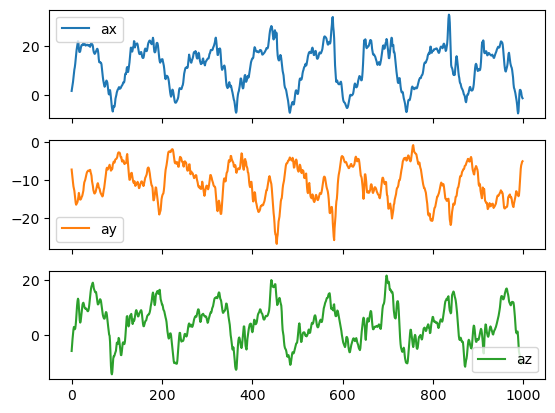

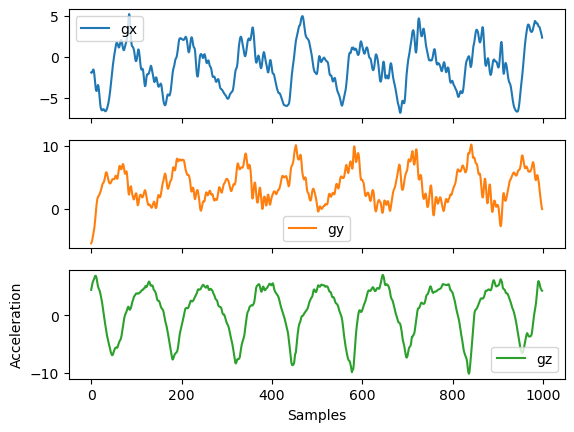

In [110]:
# singel plot
acc_dataframes[8].plot(subplots=True)
gyro_dataframes[8].plot(subplots=True )
# plt.loglog()
# plt.legend()
plt.xlabel("Samples")
plt.ylabel("Acceleration")
plt.show()

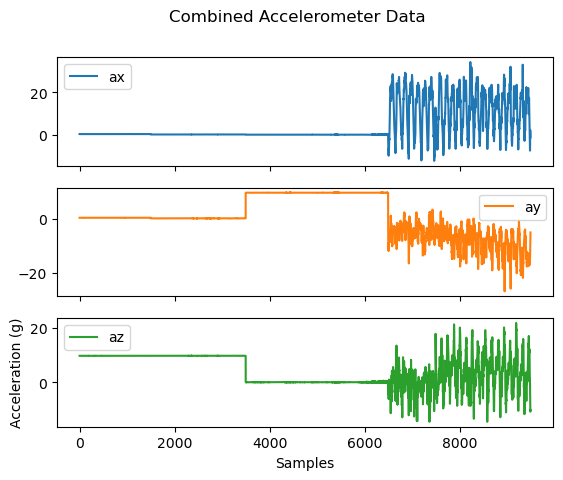

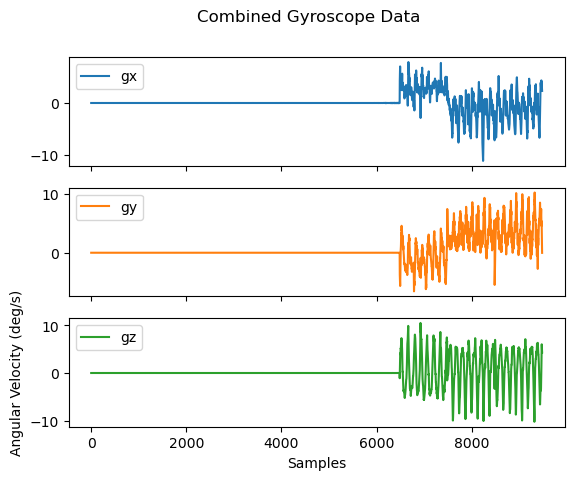

In [104]:

# Plot combined accelerometer data
combined_acc_data.plot(subplots=True, title="Combined Accelerometer Data")
plt.xlabel("Samples")
plt.ylabel("Acceleration (g)")
plt.show()

# Plot combined gyroscope data
combined_gyro_data.plot(subplots=True, title="Combined Gyroscope Data")
plt.xlabel("Samples")
plt.ylabel("Angular Velocity (deg/s)")
plt.show()


 <h1> <li>  What are we measuring with the accelerometer?</h1>

<li>Acceleration Due to Gravity: When the device is stationary, the accelerometer measures the force of gravity pulling it downwards, which can help determine the device's orientation.
<li>Linear Acceleration: When the device is moving, the accelerometer measures changes in velocity (i.e., acceleration) in the x, y, and z directions.
<li>Device Movement: By analyzing changes in acceleration, you can infer how the device is being moved, such as whether it is being shaken, tilted, or rotated.

<h1>By looking at the plots can you see the difference between the the three
classes? Explain, and take some notes for future work.

<h2>Gyroscope Data:</h2>
<ul>
  <li><strong>gx (Blue):</strong> Variability indicates changing movements around the x-axis.</li>
  <li><strong>gy (Orange):</strong> Stabilization suggests a steady position or continuous movement.</li>
  <li><strong>gz (Green):</strong> Minor fluctuations hint at a flat, steady holding position.</li>
</ul>

<h2>Accelerometer Data:</h2>
<ul>
  <li><strong>ax (Blue):</strong> Significant fluctuations indicate movement along the x-axis.</li>
  <li><strong>ay (Orange):</strong> Sharp rise and steady level suggest a transition from horizontal to vertical.</li>
  <li><strong>az (Green):</strong> Sudden change and high variability may represent rotations around the z-axis.</li>
</ul>

<h2>Conclusion:</h2>
<p>The differences in the data patterns can help distinguish between various movements and orientations, such as rotating, lying flat, or standing up. Use these insights for feature extraction and improved movement classification in future work.</p>


In [ ]:
# Create a python function that can read one accelerometer file and one
# ategyro file. What do you need as input to the function?

In [65]:
def read_data(acc_file, gyro_file):
    acc_df = pd.read_csv(acc_file, usecols=[1, 2, 3], names=['ax', 'ay', 'az'], skiprows=[0])
    gyro_df = pd.read_csv(gyro_file, usecols=[1, 2, 3], names=['gx', 'gy', 'gz'], skiprows=[0])
    return acc_df, gyro_df

In [66]:
# Save combined accelerometer and gyroscope data
combined_acc_data.to_pickle('combined_accelerometer_data.pkl')
combined_gyro_data.to_pickle('combined_gyroscope_data.pkl')


In [111]:
# Store each dataframe, one for each recording, in a binary file using the
# to_pickle function.
for i, df in enumerate(acc_dataframes):
    df.to_pickle(f'acc_{i}.pkl')

for i, df in enumerate(gyro_dataframes):
    df.to_pickle(f'gyro_{i}.pkl')

# Load the dataframes from the binary files using the read_pickle function.
acc_df = pd.read_pickle('acc_0.pkl')
gyro_df = pd.read_pickle('gyro_0.pkl')




In [89]:
# Create a python function that can read all binary-files from one class. The
# function should return a dataframe x with all the data and also a column
# with information of which class the data belongs to. The dataframe has
# now 7 columns. Set ignore_index to True, to avoid difficulties regarding merging the
# dataframes.


# Function to read all accelerometer and gyroscope binary files for one class
def read_class_data(acc_files, gyro_files, class_name):
    acc_dataframes = []
    gyro_dataframes = []

    # Loop through each file in the provided file lists
    for acc_file, gyro_file in zip(acc_files[class_name], gyro_files[class_name]):
        # Read the accelerometer and gyroscope data
        acc_df = pd.read_pickle(acc_file)
        gyro_df = pd.read_pickle(gyro_file)

        # Ensure that the dataframes have the same length by trimming the longer one
        min_length = min(len(acc_df), len(gyro_df))
        acc_df = acc_df.iloc[:min_length]
        gyro_df = gyro_df.iloc[:min_length]

        # Append the dataframes to their respective lists
        acc_dataframes.append(acc_df)
        gyro_dataframes.append(gyro_df)

    # Concatenate all accelerometer and gyroscope dataframes, reset the index
    combined_acc_data = pd.concat(acc_dataframes, ignore_index=True)
    combined_gyro_data = pd.concat(gyro_dataframes, ignore_index=True)

    # Add class labels to both dataframes
    combined_acc_data['class'] = class_name
    combined_gyro_data['class'] = class_name

    # Combine both accelerometer and gyroscope data into one dataframe (7 columns)
    combined_data = pd.concat([combined_acc_data, combined_gyro_data], axis=1)

    return combined_data

# Example 
acc_files = {
    'laying_down': ['acc_0.pkl', 'acc_1.pkl', 'acc_2.pkl']
}

gyro_files = {
    'laying_down': ['gyro_0.pkl', 'gyro_1.pkl', 'gyro_2.pkl']
}

# Call the function to read all accelerometer and gyroscope data for the 'laying_down' class
combined_data = read_class_data(acc_files, gyro_files, 'laying_down')

# Print the combined data
print(combined_data)


            ax        ay        az        class        gx        gy        gz  \
0     0.316143  0.470921  9.717941  laying_down  0.000389 -0.000002 -0.001144   
1     0.300276  0.470023  9.721235  laying_down  0.001131 -0.000242  0.002235   
2     0.313897  0.461490  9.713151  laying_down  0.000243  0.000383 -0.000577   
3     0.308808  0.460293  9.734407  laying_down -0.000346  0.000733 -0.000177   
4     0.306263  0.465831  9.726773  laying_down -0.000219  0.000228  0.000814   
...        ...       ...       ...          ...       ...       ...       ...   
3486  0.127834  0.254171  9.743838  laying_down -0.001653  0.000186 -0.000991   
3487  0.125439  0.259411  9.731264  laying_down  0.000101 -0.000207 -0.000830   
3488  0.128882  0.255818  9.732611  laying_down -0.000884  0.000184 -0.000983   
3489  0.119003  0.261506  9.735455  laying_down -0.000998  0.001128 -0.000260   
3490  0.139660  0.259560  9.733359  laying_down -0.000574 -0.000215  0.001200   

            class  
0     l

In [97]:
# Divide the data into two sets, training set and test set. Store 2 of 3 files in the
# training folder and 1 of 3 files in the test folder. Note: it is the binary pickle files
# we talk about


# Divide the data into training and test sets
def split_data(acc_files, gyro_files):
    training_data = []
    test_data = []

    # Loop through each class in acc_files
    for class_name in acc_files.keys():
        combined_data = read_class_data(acc_files, gyro_files, class_name)
        
        # Calculate the split index for 2/3 training, 1/3 testing
        split_idx = 2 * len(combined_data) // 3

        # Append training and test data to respective lists
        training_data.append(combined_data.iloc[:split_idx])
        test_data.append(combined_data.iloc[split_idx:])
    
    # Concatenate the lists into single DataFrames for training and testing
    training_data = pd.concat(training_data, ignore_index=True)
    test_data = pd.concat(test_data, ignore_index=True)

    return training_data, test_data

# Example
acc_files = {
    'laying_down': ['acc_0.pkl', 'acc_1.pkl', 'acc_2.pkl'],
    'standing_up': ['acc_3.pkl', 'acc_4.pkl', 'acc_5.pkl'],
}

gyro_files = {
    'laying_down': ['gyro_0.pkl', 'gyro_1.pkl', 'gyro_2.pkl'],
    'standing_up': ['gyro_3.pkl', 'gyro_4.pkl', 'gyro_5.pkl'],
}

# Call the function to split the data into training and testing sets
training_data, test_data = split_data(acc_files, gyro_files)

# Print the training and testing data
print("Training Data:")
print(training_data)
print("Test Data:")
print(test_data)





Training Data:
            ax        ay        az        class        gx        gy        gz  \
0     0.316143  0.470921  9.717941  laying_down  0.000389 -0.000002 -0.001144   
1     0.300276  0.470023  9.721235  laying_down  0.001131 -0.000242  0.002235   
2     0.313897  0.461490  9.713151  laying_down  0.000243  0.000383 -0.000577   
3     0.308808  0.460293  9.734407  laying_down -0.000346  0.000733 -0.000177   
4     0.306263  0.465831  9.726773  laying_down -0.000219  0.000228  0.000814   
...        ...       ...       ...          ...       ...       ...       ...   
4318  0.026046  9.815538 -0.009131  standing_up -0.002481  0.000960  0.002258   
4319  0.032183  9.815389 -0.001198  standing_up -0.001031  0.000400  0.000137   
4320  0.035027  9.797726  0.011825  standing_up -0.000837  0.000481  0.000912   
4321  0.026196  9.792935  0.038919  standing_up  0.001993  0.000413  0.000080   
4322  0.011975  9.814640  0.049547  standing_up  0.003998  0.000607  0.000778   

            